# Учебный проект 7_Обучение с учителем: качество модели

## Содержание

* [Описание проекта](#описание-проекта)
* [Импорт библиотек Python и загрузка данных](#импорт-библиотек-python-и-загрузка-данных)
* [Предобработка данных](#предобработка-данных)
* [Исследовательский анализ данных](#исследовательский-анализ-данных)
* [Корреляционный анализ данных](#объединение-данных)
* [Построение моделей линейной регрессии](#построение-моделей-линейной-регрессии)
    * [Первая модель линейной регрессии](#первая-модель-линейной-регрессии)
    * [Вторая модель линейной регрессии](#вторая-модель-линейной-регрессии)
    * [Третья модель линейной регрессии](#третья-модель-линейной-регрессии)
    * [Прогноз удоя коров](#прогноз-удоя-коров)
* [Построение модели логистической регрессии](#построение-модели-лостической-регрессии)
    * [Обучение модели и анализ ее качества]()
    * [Прогноз вкуса молока](#прогноз-вкуса-молока)
* [Подготовка финального свода покупки коров](#подготовка-финального-свода-покупки-коров)
* [Общий вывод по исследованию](#общий-вывод-по-исследованию)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные `поведении покупателей на сайте интернет-магазина, выручке магазина с одного покупателя, времени посещения покупателями сайта интернет-магазина и таблица с данными о среднемесячной прибыли продавца за последние 3 месяца`, которые были предоставлены руководством компании "В один клик".

---

`Задача`

**Разработать модели машинного обучения для персонализации предложений постоянным клиентам магазина**:

---

`Путь решения`

1. Промаркировать уровень финансовой активности постоянных покупателей: `снизилась` - если клиент стал покупать меньше товаров; `прежний уровень`;
2. Собрать данные по клиентам по следующим группам:
    * Признаки, которые описывают коммуникацию сотрудников компании с клиентом;
    * Признаки, которые описывают продуктовое поведение покупателя;
    * Признаки, которые описывают покупательское поведение клиента;
    * Признаки, которые описывают поведение покупателя на сайте.
3. Построить модель, которая `предскажет вероятность снижения покупательской активности клиента в следующие 3 месяца`;
4. Провести исследование прибыльности клиента - `какой доход каждый покупатель приносил компании за последние 3 месяца`;
5. Выделить сегменты покупателей и разработать для них персонализированные предложения.

---

`Располагаемые данные`

**Поведение покупателя на сайте - market_file**

* id - номер покупателя в корпоративной базе данных;
* Покупательская активность — рассчитанный класс покупательской активности (целевой признак): `снизилась` или `прежний уровень`;
* Тип сервиса — уровень сервиса, например `премиум` и `стандарт`;
* Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель;
* Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента;
* Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце;
* Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте;
* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
* Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев;
* Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;
* Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца;
* Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта;
* Страниц_за_визит - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**Данные о выручке с покупателя - market_money**

* id — номер покупателя в корпоративной базе данных;
* Период — название периода, во время которого зафиксирована выручка. Например, `текущий_месяц` или `предыдущий_месяц`;
* Выручка - сумма выручки за период.

**Данные о времени, которое покупатель провел на сайте - market_time**

* id — номер покупателя в корпоративной базе данных;
* Период — название периода, во время которого зафиксировано общее время;
* минут — значение времени, проведённого на сайте, в минутах.

**Данные о среднемесячной прибыли продавца за последние 3 месяца - money**

* id - номер покупателя в корпоративной базе данных;
* Прибыль - значение прибыли.

## Импорт библиотек Python и загрузка данных <a class = 'anchor' id = 'Импорт'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для решения задач машинного обучения.
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных в соответствие с названиями загружаемых датасетов:
    * **market_file**;
    * **market_money**;
    * **market_time**;
    * **money**;
3. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
    * визуализация распределения количественных показателей.
4. Формирование вывода по итогам данного этапа.

In [1]:
# импорт библиотек python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# модели классификации
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

# метрики оценки эффективности моделей
from sklearn.metrics import (accuracy_score,
                             recall_score,
                             precision_score,
                             confusion_matrix,
                             f1_score,
                             roc_auc_score)

# механизмы отбора данных и подбора параметров моделей
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from optuna.integration import OptunaSearchCV
from optuna import distributions, visualization

# механизмы подготовки данных
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder,
                                   PolynomialFeatures)

# механизмы устранения дисбаланса классов
from imblearn.over_sampling import RandomOverSampler

# механизмы построения пайплайнов
from sklearn.pipeline import Pipeline

c:\Users\k.storozhuk\Desktop\YandexPraktikum_projects\.py_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# загрузка данных в рабочую среду
try:
    market_file = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/market_file.csv', sep = ',') # поведение покупателя на сайте
    market_money = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/market_money.csv', sep = ',') # выручка с покупателя
    market_time = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/market_time.csv', sep = ',') # время, проведенное покупателем на сайте
    money = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/money.csv', sep = ';') # среднемесячная прибыль продавца за последние 3 месяца
except:
    market_file = pd.read_csv('/datasets/market_file.csv', sep = ',')
    market_money = pd.read_csv('/datasets/market_money.csv', sep = ',')
    market_time = pd.read_csv('/datasets/market_time.csv', sep = ';')
    money = pd.read_csv('/datasets/money.csv', sep = ';')

In [3]:
# инициализация пользовательской функции для первичного изучения содержимого наборов данных
def  first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print('Общая информация о наборе')
    print(df.info())
    print()

In [4]:
# инициализация пользовательской функции построения распределений числовых признаков
def num_distribution(df : pd.DataFrame, sizes: tuple, bins : int):
    df.iloc[:, 1:].hist(figsize = sizes,
                        grid = False,
                        bins = bins) # исключаем столбец с id пользователей - по умолчанию у него всегда 1-ый номер
    plt.grid(False)
    plt.show()

Структура набора данных market_file


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошиб

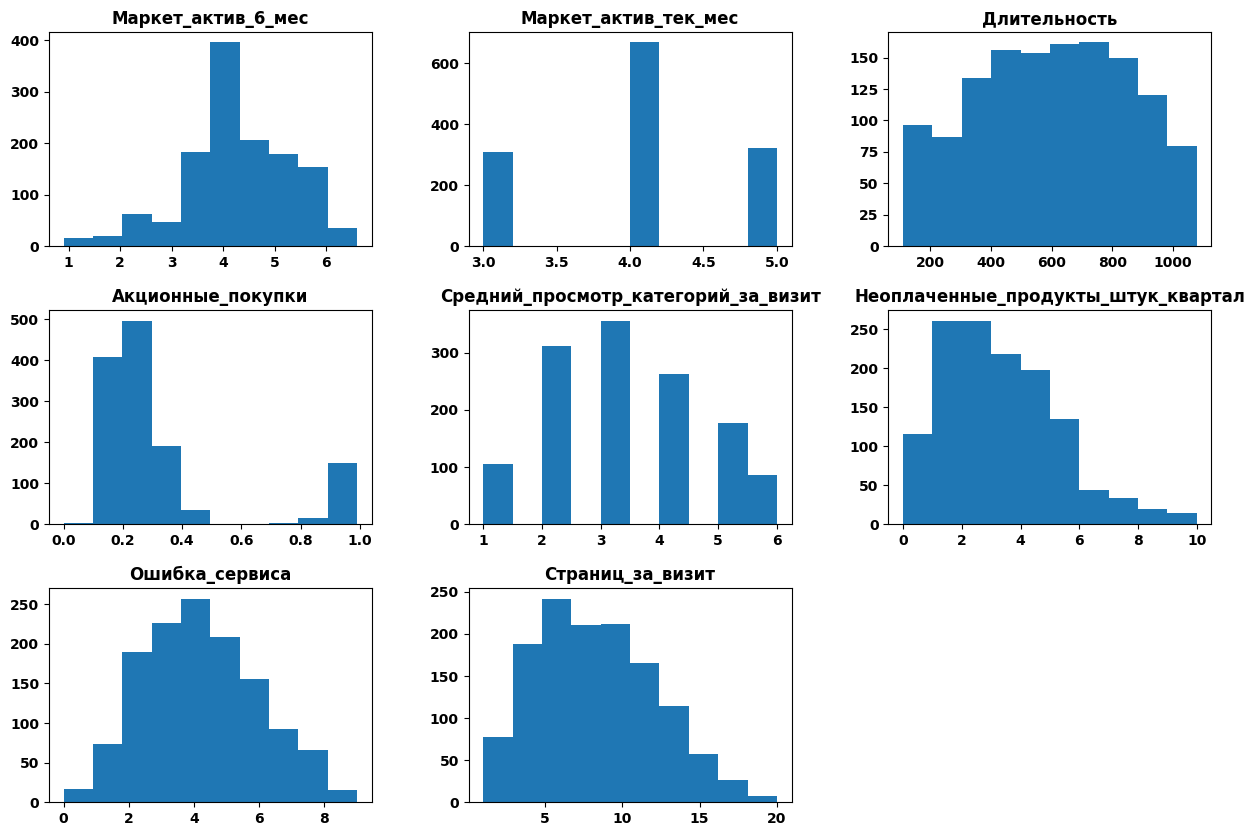

In [5]:
# вывод на экран параметров датасета 'market_file'
first_meeting(market_file, 'market_file')
num_distribution(market_file, (15, 10), 10)

Структура набора данных market_money


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None



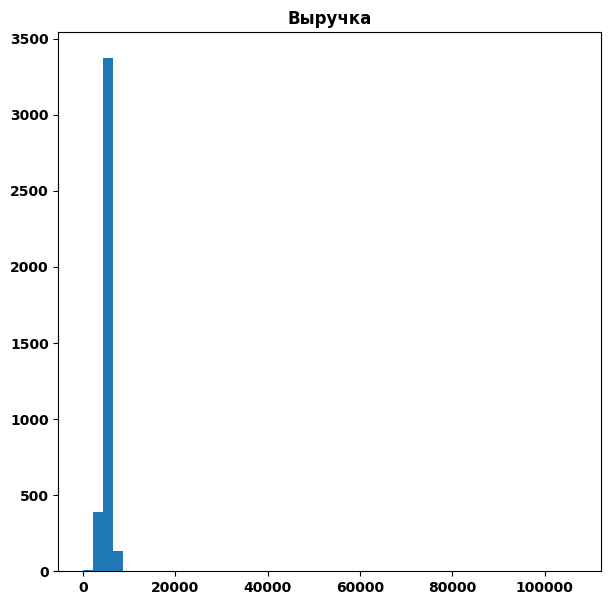

In [6]:
first_meeting(market_money, 'market_money')
num_distribution(market_money, (7, 7), 50)

Структура набора данных market_time


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None



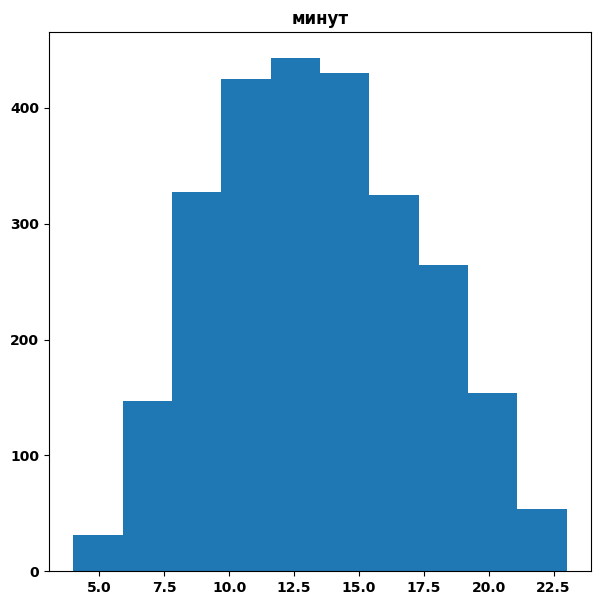

In [7]:
first_meeting(market_time, 'market_time')
num_distribution(market_time, (7, 7), 10)

Структура набора данных money


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None



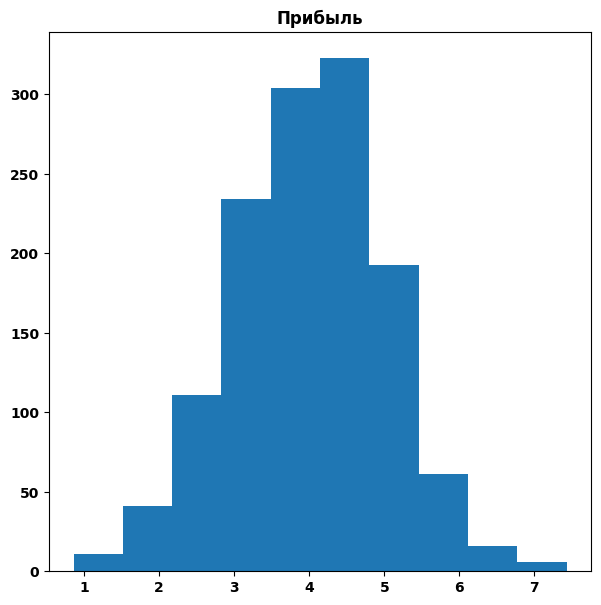

In [8]:
# преобразование типа данных в столбце 'Прибыль'
money['Прибыль'] = pd.to_numeric(money['Прибыль'].str.replace(',', '.'))

first_meeting(money, 'money')
num_distribution(money, (7, 7), 10)

**Вывод**

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для решения задач машинного обучения:
        * LogisticRegression - модель логистической регрессии;
        * KNeighborsClassifier - модель k-ближайших соседей;
        * SVC - машина опорных векторов;
        * DecisionTreeClassifier - модель дерева принятия решений;
        * plot_tree - визуализация дерева решений;
        * метрики оценки эффективности моделей классификации;
        * train_test_split - механизм разделения данных;
        * GridSearchCV - механизм поиска гиперпараметров с перебором по "сетке";
        * RandomizedSearchCV - механизм поиска гиперпараметров со случайным перебором;
        * cross_val_score - механизм проверки модели на кросс-валидации;
        * OptunaSearchCV - механизм поиска гиперпараметров с помощью библиотеки Optuna;
        * distributions - распределения для Optuna;
        * visualization - визуализация для Optuna;
        * StandardScaler - стандартизация данных;
        * MinMaxScaler - нормализация данных;
        * OrdinalEncoder - порядковое кодирование категориальных признаков;
        * OneHotEncoder - one-hot кодирование категориальных признаков;
        * PolynomialFeatures - полиномиальные признаки;
        * RandomOverSampler - механизм устранения дисбаланса классов;
        * Pipeline - механизм построения пайплайнов.
2. Произведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные в соответствие с названиями загружаемых датасетов:
    * `market_file`;
    * `market_money`;
    * `market_time`;
    * `money`;
3. Выведены на экран параметры датасетов:
    * `market_file`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Наблюдаются неверные написания значений категориальных признаков (на примере **"стандартт"** в столбце **Тип сервиса**). Требуется проверка набора данных на неявные дубликаты.
    * `market_money`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах.
    * `market_time`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Наблюдаются неверные написания значений категориальных признаков (на примере **"предыдцщий_месяц"** в столбце **Период**). Требуется проверка набора данных на неявные дубликаты.
    * `money`
        * Произведена обработка числовых значений в столбце **Прибыль** - изменено форматирование дробной части. Тип данных - float;
        * В наборе данных **отсутствуют пустые значения**.

## Предобработка данных <a class = 'anchor' id = 'Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Замена названий столбцов - для упрощения навигации по датасету и улучшения читабельности данных:
    * Перевод названий столбцов на английский язык;
    * Приведение столбцов к формату snake_case.
2. Проверка датасетов на дубликаты:
    * Явные дубликаты;
    * Неявные дубликаты.
3. Формирование вывода по итогам данного этапа.

In [9]:
# замена названий столбцов в датасете 'market_file'
market_file = market_file.rename(columns={
    'id' : 'user_id',
    'Покупательская активность' : 'buyer_activity',
    'Тип сервиса' : 'service_type',
    'Разрешить сообщать' : 'allow_notifications',
    'Маркет_актив_6_мес' : 'market_activity_6_months',
    'Маркет_актив_тек_мес' : 'market_activity_current_month',
    'Длительность' : 'duration',
    'Акционные_покупки' : 'discount_purchases',
    'Популярная_категория' : 'popular_category',
    'Средний_просмотр_категорий_за_визит' : 'average_category_views',
    'Неоплаченные_продукты_штук_квартал' : 'unpaid_products',
    'Ошибка_сервиса' : 'service_error',
    'Страниц_за_визит' : 'pages_per_visit'
})

# замена названий столбцов в датасете 'market_money'
market_money = market_money.rename(columns = {
    'id' : 'user_id',
    'Период' : 'period',
    'Выручка' : 'revenue'
})

# замена названий столбцов в датасете 'market_time'
market_time = market_time.rename(columns = {
    'id' : 'user_id',
    'Период' : 'period',
    'минут' : 'minutes'
})

# замена названий столбцов в датасете 'money'
money = money.rename(columns = {
    'id' : 'user_id',
    'Прибыль' : 'profit'
})

In [10]:
# инициализация пользовательской функции проверки уникальных значений по столбцам датасета
def unique_values(df : pd.DataFrame):
    df = df.select_dtypes(exclude = 'number')
    for column in df.columns:
        print(f'Столбец {column}: {list(df[column].unique())}')

In [11]:
# проверка набора 'market_file' на уникальные значения
print('Уникальные значения по категориальным столбцам market_file')
unique_values(market_file)

Уникальные значения по категориальным столбцам market_file
Столбец buyer_activity: ['Снизилась', 'Прежний уровень']
Столбец service_type: ['премиум', 'стандартт', 'стандарт']
Столбец allow_notifications: ['да', 'нет']
Столбец popular_category: ['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары', 'Техника для красоты и здоровья', 'Кухонная посуда', 'Мелкая бытовая техника и электроника']


In [12]:
# проверка набора 'market_money' на уникальные значения
print('Уникальные значения по категориальным столбцам market_money')
unique_values(market_money)

Уникальные значения по категориальным столбцам market_money
Столбец period: ['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']


In [13]:
# проверка набора 'market_time' на уникальные значения
print('Уникальные значения по категориальным столбцам market_time')
unique_values(market_time)

Уникальные значения по категориальным столбцам market_time
Столбец period: ['текущий_месяц', 'предыдцщий_месяц']


In [14]:
# понижение регистра значений в категориальных признаках в каждом из наборов данных
for data in [market_file, market_money, market_time]:
    cols = list(data.select_dtypes(exclude='number').columns)
    data[cols] = data[cols].apply(lambda x: x.str.lower())

In [15]:
# инициализация пользовательской функции по замене значений в категориальных столбцах
def replace_values(df : pd.DataFrame, column : str, old_value : str, new_value : str):
    df.loc[df[column] == old_value, column] = new_value

In [16]:
# замена значений в датасетах
replace_values(market_file, 'service_type', 'стандартт', 'стандарт')
replace_values(market_money, 'period', 'препредыдущий_месяц', 'предыдущий_месяц')
replace_values(market_time, 'period', 'предыдцщий_месяц', 'предыдущий_месяц')

In [17]:
# инициализация переменных 'data_names_list' и 'data_list' для хранения списка названий наборов данных и самих наборов данных
data_names_list = ['market_file', 'market_money', 'market_time', 'money']
data_list = [market_file, market_money, market_time, money]

In [18]:
# проверка на наличие явных дубликатов
counter = 0

print('Проверка на наличие явных дубликатов')
for df in data_list:
    print(f'Число явных дубликатов в {data_names_list[counter]}: {df.duplicated().sum()}')
    counter += 1

Проверка на наличие явных дубликатов
Число явных дубликатов в market_file: 0
Число явных дубликатов в market_money: 5
Число явных дубликатов в market_time: 0
Число явных дубликатов в money: 0


In [19]:
# вывод на экран задублированных строк в наборе 'market_money'
market_money[market_money.duplicated()]

,user_id,period,revenue
2,215348,предыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
35,215359,предыдущий_месяц,0.0
1951,215998,предыдущий_месяц,4342.0
2117,216053,предыдущий_месяц,5145.0


**Вывод по промежуточному этапу**

При визуальной проверке задублированных строк в наборе `market_money` **явные дубликаты не выявлены** - данные строки можно сохранить в наборе.

**Вывод**

1. Выполнена замена названий столбцов в датасетах:
    * Названия переведены на английский язык;
    * Названия приведены к формату snake_case.
2. Выполнена проверка наборов данных на дубликаты:
    * **Явные дубликаты** - явные дубликаты **не обнаружены**; 
    * Неявные дубликаты:
        * Столбец **service_type** в наборе `market_file` - преобразованы значения "стандартт" на "стандарт";
        * Столбец **period** в наборе `market_money` - преобразованы значения "препредыдущий_месяц" на "предыдущий_месяц";
        * Столбец **period** в наборе `market_time` - преобразованы значения "предыдцщий_месяц" на "предыдущий_месяц";
3. Данные прошли этап предобработки и готовы к исследовательскому анализу.

## Исследовательский анализ данных <a class = 'anchor' id = 'Исследование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Вывод на экран основной статистической информации по текущим версиям наборов данных;
2. Исследование соотношения количества значений качественных показателей;
3. Исследование распределения количественных показателей наборов. Построение **гистограмм распределения значений**;
4. Фильтрация наборов данных - **отбор клиентов с покупательской активностью не менее 3 месяцев**. Исключение аномально больших / малых значений из наборов данных;
5. Формирование вывода по итогам этапа.

In [20]:
# вывод на экран основных статистик по наборам данных
counter = 0

for df in data_list:
    print(f'Основная статистическая информация по набору {data_names_list[counter]}')
    display(df.iloc[:, 1:].describe().T)
    counter += 1
    print()

Основная статистическая информация по набору market_file


,count,mean,std,min,25%,50%,75%,max
market_activity_6_months,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60
market_activity_current_month,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00
duration,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00
discount_purchases,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
average_category_views,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
unpaid_products,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00
service_error,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00
pages_per_visit,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00



Основная статистическая информация по набору market_money


,count,mean,std,min,25%,50%,75%,max
revenue,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.0,106862.2



Основная статистическая информация по набору market_time


,count,mean,std,min,25%,50%,75%,max
minutes,2600.0,13.336154,4.080198,4.0,10.0,13.0,16.0,23.0



Основная статистическая информация по набору money


,count,mean,std,min,25%,50%,75%,max
profit,1300.0,3.996631,1.013722,0.86,3.3,4.045,4.67,7.43


**Вывод по промежуточному этапу**:

Набор `market_file` характеризуется следующими статистическими показателями:

* **market_activity_6_months - среднемесячное значение маркетинговых коммуникаций на пользователя**:
    * Среднее значение - 4.3;
    * Минимальное значение - 0.9;
    * Максимальное значение - 6.6;
    * Стандартное отклонение - 1.1.
* **market_activity_current_month - количество маркетинговых коммуникаций в текущем месяце**:
    * Среднее значение - 4.0;
    * Минимальное значение - 3.0;
    * Максимальное значение - 5.0;
    * Стандартное отклонение - 0.7. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **duration - сколько времени прошло с момента регистрации пользователя на сайте**:
    * Среднее значение - 601.9;
    * Минимальное значение - 110;
    * Максимальное значение - 1 079;
    * Стандартное отклонение - 249,9. Ряд данных достаточно вариативен, но **явных выбросов пока не обнаружено**. Потребуется проверка на следующих шагах.
* **discount_purchases - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев**:
    * Среднее значение - 0.32;
    * Минимальное значение - 0.0;
    * Максимальное значение - 0.99;
    * Стандартное отклонение - 0.25. Заметно значение в 99% совершенных покупок по акции - скорее всего пользователь совершает покупки исключительно акционных товаров.
* **average_category_views - показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца**:
    * Среднее значение - 3.3;
    * Минимальное значение - 1.0;
    * Максимальное значение - 6.0;
    * Стандартное отклонение - 1.4. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **unpaid_products - общее число неоплаченных товаров в корзине за последние 3 месяца**:
    * Среднее значение - 2.8;
    * Минимальное значение - 0.0;
    * Максимальное значение - 10.0;
    * Стандартное отклонение - 2.0. Заметно большое максимальное значение в 10 неоплаченных единиц - вероятно, что это есть уникальный пользователь, который добавил в корзину большое значение товаров с целью последующей будущей покупки (корзина выполняет роль "Избранное").
* **service_error - число сбоев, которые коснулись покупателя во время посещения сайта**:
    * Среднее значение - 4.2;
    * Минимальное значение - 0.0;
    * Максимальное значение - 9.0;
    * Стандартное отклонение - 2.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **pages_per_visit - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца**:
    * Среднее значение - 8.2;
    * Минимальное значение - 1.0;
    * Максимальное значение - 20.0;
    * Стандартное отклонение - 4.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.

Набор `market_money` характеризуется следующими статистическими показателями:

* **revenue - сумма выручки за период**:
    * Среднее значение - 5 025.7;
    * Минимальное значение - 0.0;
    * Максимальное значение - 106 862.2;
    * Стандартное отклонение - 1 777.7. Обнаружена аномально большая сумма выручки. Потребуется проверка на следующих шагах и устранение аномалий.

Набор `market_time` характеризуется следующими статистическими показателями:

* **minutes - время, проведенное на сайте, в минутах**:
    * Среднее значение - 13.3;
    * Минимальное значение - 4.0;
    * Максимальное значение - 23.0;
    * Стандартное отклонение - 4.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.

Набор `money` характеризуется следующими статистическими показателями:

* **profit - значение прибыли**:
    * Среднее значение - 4.0;
    * Минимальное значение - 0.86;
    * Максимальное значение - 7.43;
    * Стандартное отклонение - 1.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.

In [21]:
# инициализация пользовательской функции просмотра соотношения значений категориальных данных
def cat_info(df : pd.DataFrame):
    df = df.select_dtypes(exclude = 'number')
    for column in df.columns:
        print(f'Столбец {column}:')
        pivot_data = df[column].value_counts().to_frame()
        pivot_data['%_of total'] = round(pivot_data['count'] * 100 / df[column].count(), 1)
        display(pivot_data)

In [22]:
cat_info(market_file)

Столбец buyer_activity:


,count,%_of total
buyer_activity,,
прежний уровень,802,61.7
снизилась,498,38.3


Столбец service_type:


,count,%_of total
service_type,,
стандарт,924,71.1
премиум,376,28.9


Столбец allow_notifications:


,count,%_of total
allow_notifications,,
да,962,74.0
нет,338,26.0


Столбец popular_category:


,count,%_of total
popular_category,,
товары для детей,330,25.4
домашний текстиль,251,19.3
косметика и аксесуары,223,17.2
техника для красоты и здоровья,184,14.2
мелкая бытовая техника и электроника,174,13.4
кухонная посуда,138,10.6


**Вывод по промежуточному этапу**

* Значения по признаку **buyer_activity** соотнесены не в равных пропорциях: 802 (62%) - 498 (32%);
* Значения по признаку **service_type** соотнесены не в равных пропорциях: 924 (71%) - 376 (29%);
* Значения по признаку **allow_notifications** соотнесены не в равных пропорциях: 962 (74%) - 338 (26%);
* Значения по признаку **popular_category** распределены более равномерно, чем значения по остальным показателям. Диапазон варьируется от 138 до 330.

На последующем этапе подготовки данных для машинного обучения потребуется "выравнивание" значений по показателям - повышение значений минорного класса до мажорного, или наоборот.

In [23]:
cat_info(market_money)

Столбец period:


,count,%_of total
period,,
предыдущий_месяц,2600,66.7
текущий_месяц,1300,33.3


**Вывод по промежуточному этапу**

* Значения по признаку **period** соотнесены не в равных пропорциях: 2 600 (62%) - 1 300 (32%);

На последующем этапе подготовки данных для машинного обучения потребуется "выравнивание" значений по показателям - повышение значений минорного класса до мажорного, или наоборот.

In [24]:
cat_info(market_time)

Столбец period:


,count,%_of total
period,,
текущий_месяц,1300,50.0
предыдущий_месяц,1300,50.0


**Вывод по промежуточному этапу**

* Значения по признаку **period** соотнесены в равных пропорциях: 1 300 (50%) - 1 300 (50%);

Последующего "выравнивания" не потребуется.

In [25]:
# инициализация пользовательской функции по построению гистограмм по передаваемым метрикам
def histogram_plotting(data: pd.DataFrame, feature : str, bins: int, x_size: int, y_size: int, feature_xlabel : str):
    # вычисление статистических метрик для дальнейшей визуализации
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    # построение визуализации
    plt.figure(figsize = (x_size, y_size))
    plt.hist(data[feature], color = 'blue', edgecolor = 'white', bins = bins)
    plt.axvline(upper_bound, c = 'red', ls = '-', label = 'верхняя граница допустимых значений')
    plt.axvline(q3, c = 'red', ls = '--', label = '3 квартиль значений')
    plt.axvline(q1, c = 'black', ls = '--', label = '1 квартиль значений')
    plt.axvline(lower_bound, c = 'black', ls = '-', label = 'нижняя граница допустимых значений')
    plt.title(f'Гистограмма распределения значений по метрике: {feature_xlabel}', fontsize = 10)
    plt.xlabel(feature_xlabel)
    plt.ylabel('Количество значений по метрике')
    plt.legend()
    plt.show()

    # вывод статистических метрик на экран
    print('Верхняя допустимая граница значений:', upper_bound)
    print('Нижняя допустимая граница значений:', lower_bound)
    print('Медианное значение:', data[feature].median())
    print('Среднее значение:', round(data[feature].mean(), 2))

    # расчет доли аномальных значений по метрике
    print('Доля значений, выходящих за верхнюю границу: {:.2%}'.format(data[data[feature] > upper_bound].shape[0] / data[feature].shape[0]))
    print('Доля значений, выходящих за нижнюю границу: {:.2%}'.format(data[data[feature] < lower_bound].shape[0] / data[feature].shape[0]))

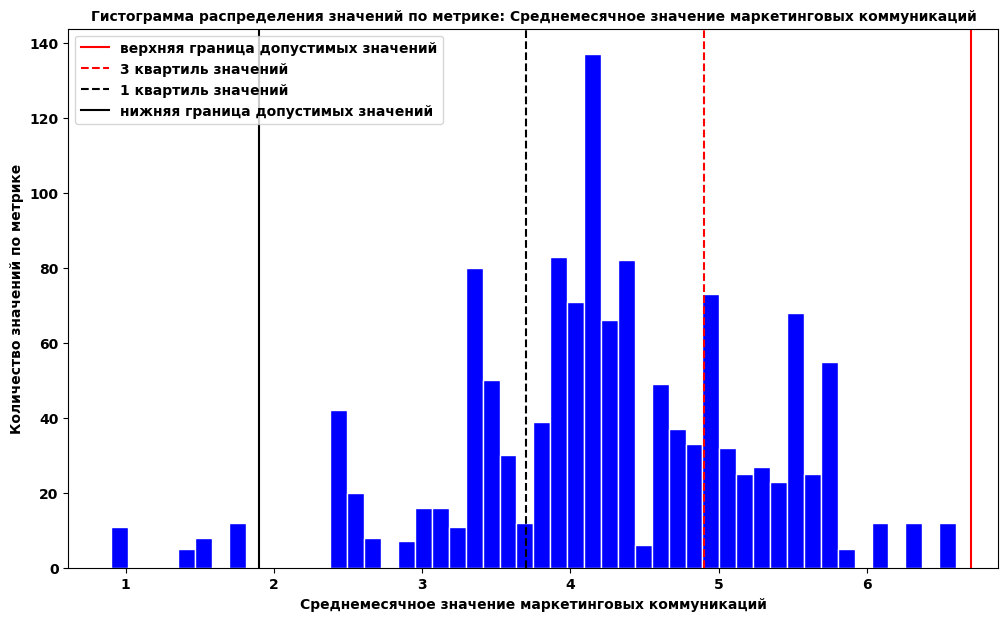

Верхняя допустимая граница значений: 6.700000000000001
Нижняя допустимая граница значений: 1.9
Медианное значение: 4.2
Среднее значение: 4.25
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 2.77%


In [26]:
histogram_plotting(market_file, 'market_activity_6_months', 50, 12, 7, 'Среднемесячное значение маркетинговых коммуникаций')

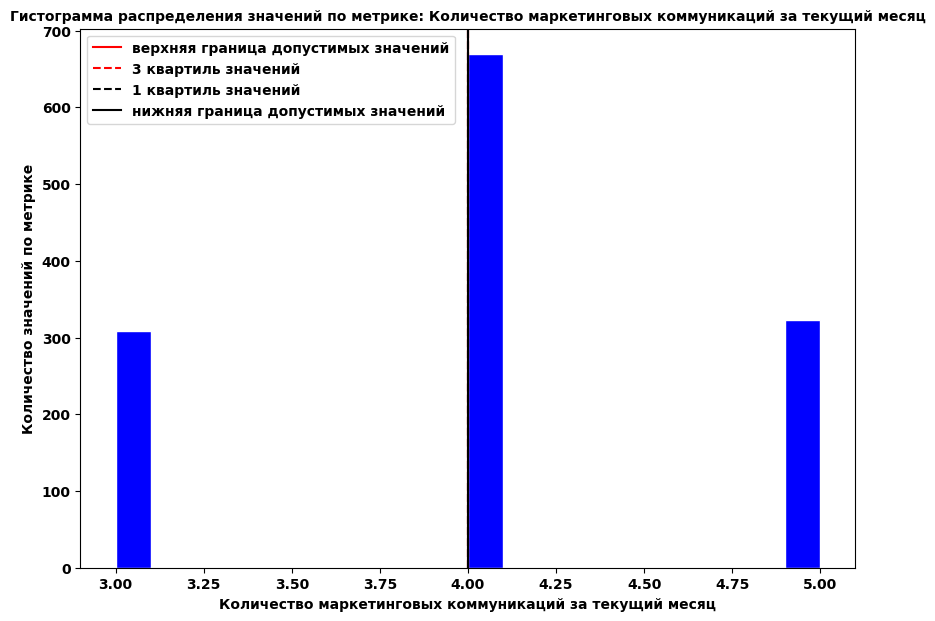

Верхняя допустимая граница значений: 4.0
Нижняя допустимая граница значений: 4.0
Медианное значение: 4.0
Среднее значение: 4.01
Доля значений, выходящих за верхнюю границу: 24.85%
Доля значений, выходящих за нижнюю границу: 23.69%


In [27]:
histogram_plotting(market_file, 'market_activity_current_month', 20, 10, 7, 'Количество маркетинговых коммуникаций за текущий месяц')

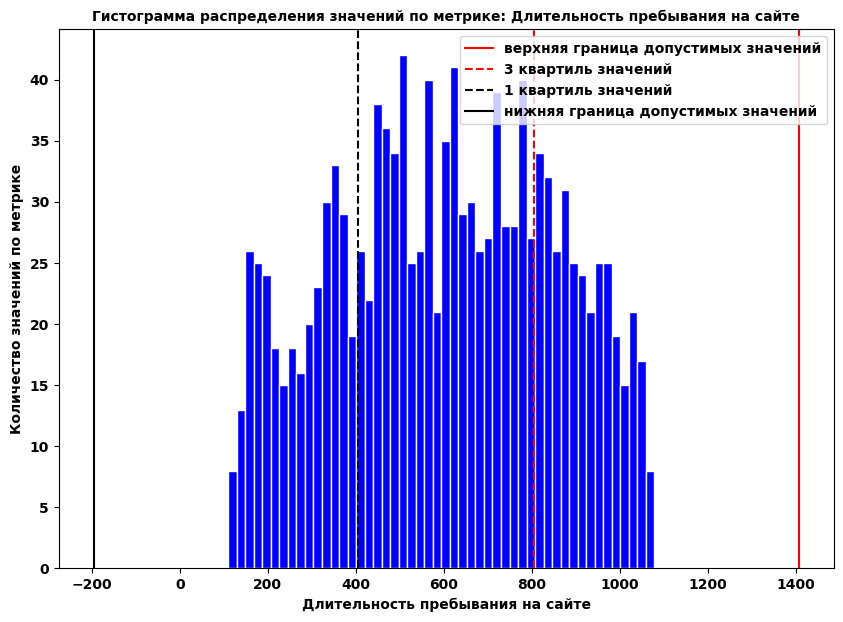

Верхняя допустимая граница значений: 1406.75
Нижняя допустимая граница значений: -195.25
Медианное значение: 606.0
Среднее значение: 601.9
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [28]:
histogram_plotting(market_file, 'duration', 50, 10, 7, 'Длительность пребывания на сайте')  

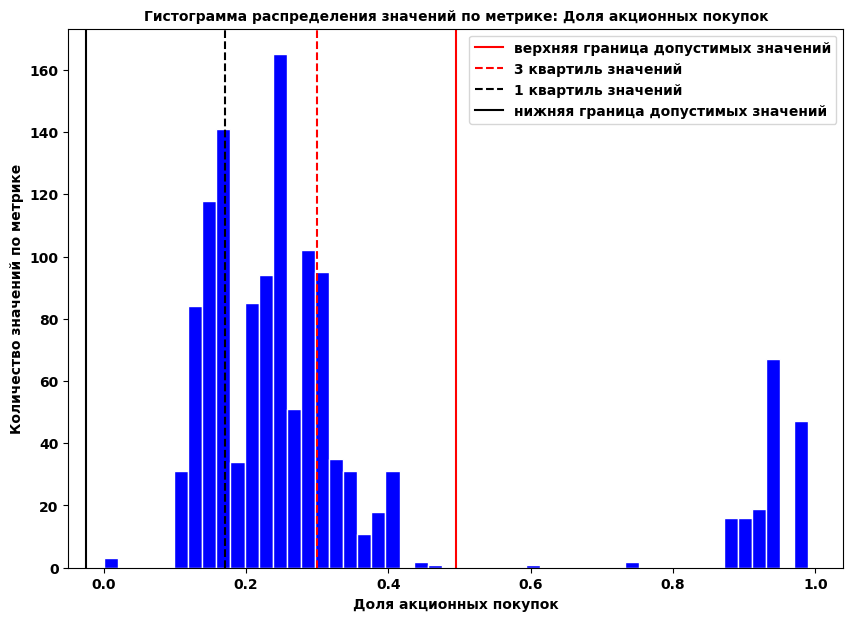

Верхняя допустимая граница значений: 0.49499999999999994
Нижняя допустимая граница значений: -0.02499999999999994
Медианное значение: 0.24
Среднее значение: 0.32
Доля значений, выходящих за верхнюю границу: 12.92%
Доля значений, выходящих за нижнюю границу: 0.00%


In [29]:
histogram_plotting(market_file, 'discount_purchases', 50, 10, 7, 'Доля акционных покупок')  

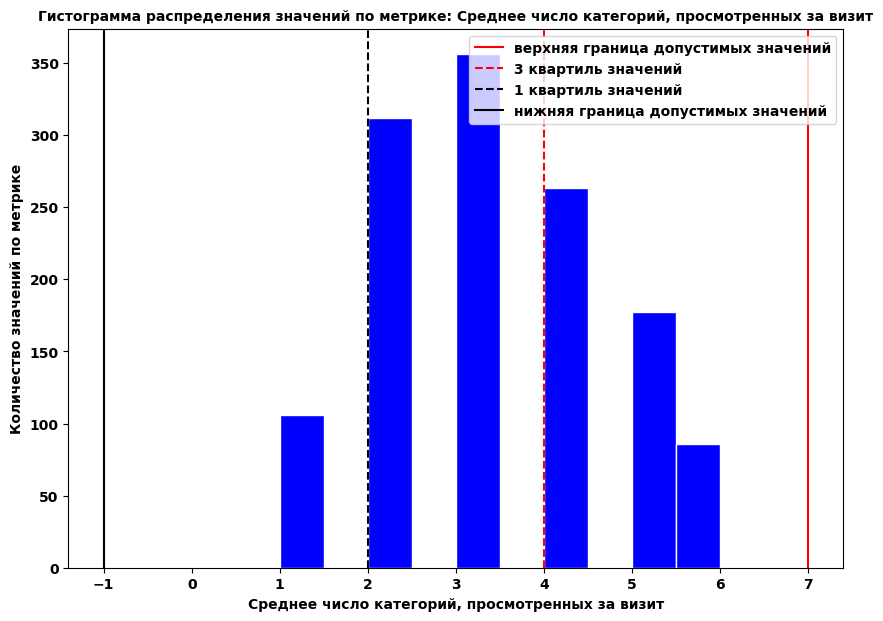

Верхняя допустимая граница значений: 7.0
Нижняя допустимая граница значений: -1.0
Медианное значение: 3.0
Среднее значение: 3.27
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [30]:
histogram_plotting(market_file, 'average_category_views', 10, 10, 7, 'Среднее число категорий, просмотренных за визит')  

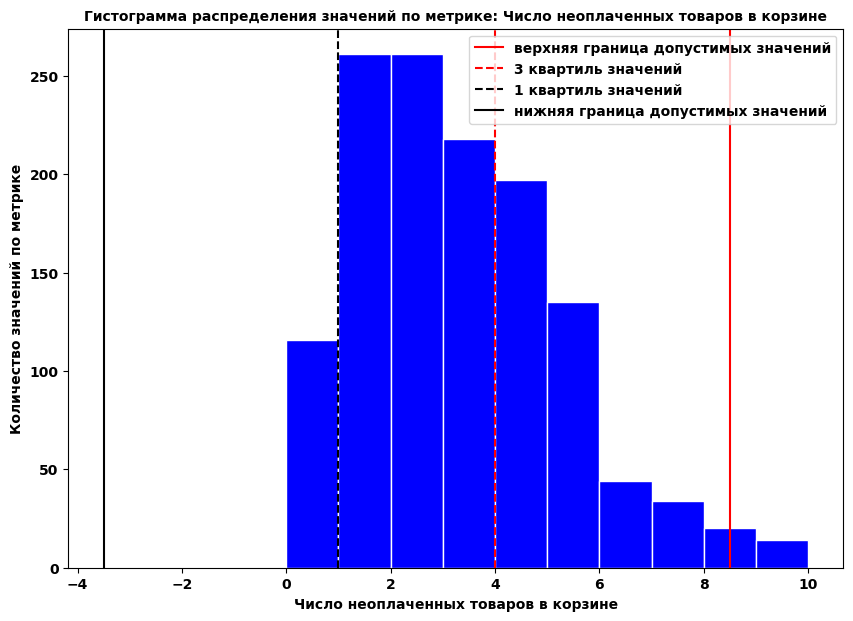

Верхняя допустимая граница значений: 8.5
Нижняя допустимая граница значений: -3.5
Медианное значение: 3.0
Среднее значение: 2.84
Доля значений, выходящих за верхнюю границу: 1.08%
Доля значений, выходящих за нижнюю границу: 0.00%


In [31]:
histogram_plotting(market_file, 'unpaid_products', 10, 10, 7, 'Число неоплаченных товаров в корзине')  

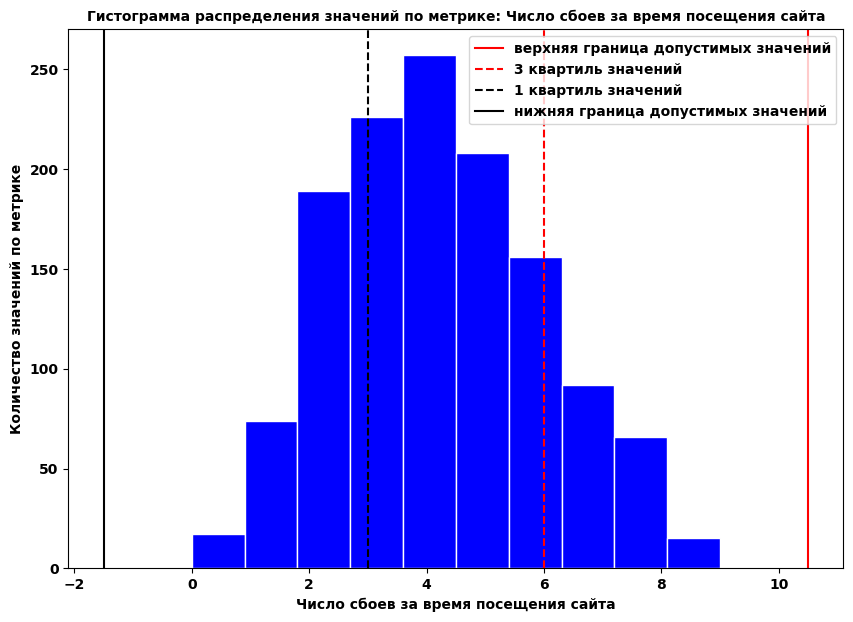

Верхняя допустимая граница значений: 10.5
Нижняя допустимая граница значений: -1.5
Медианное значение: 4.0
Среднее значение: 4.19
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [32]:
histogram_plotting(market_file, 'service_error', 10, 10, 7, 'Число сбоев за время посещения сайта')  

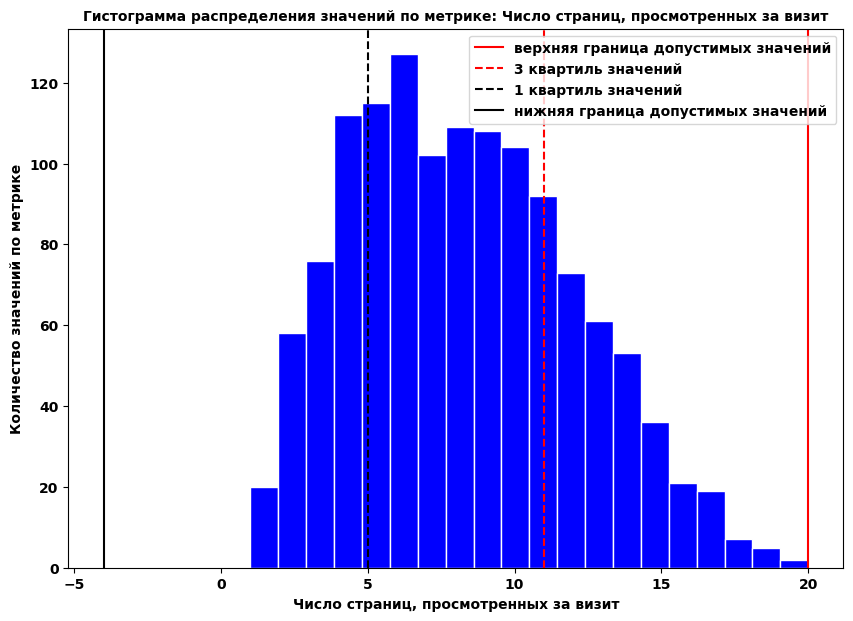

Верхняя допустимая граница значений: 20.0
Нижняя допустимая граница значений: -4.0
Медианное значение: 8.0
Среднее значение: 8.18
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [33]:
histogram_plotting(market_file, 'pages_per_visit', 20, 10, 7, 'Число страниц, просмотренных за визит')

**Вывод по промежуточному этапу:**

* **market_activity_6_months** - среднемесячное значение маркетинговых коммуникаций
    * Распределение имеет вид **нормального**. Значения группируются около среднего **4.25** и медианы **4.2**;
    * Заметны как несколько объектов с большим количеством маркетинговых коммуникаций (>6), так и объекты с минимальным количеством коммуникаций (<2).
* **market_activity_current_month** - количество маркетинговых коммуникаций за текущий месяц
    * Большая часть значений находится на отметке 4;
    * Пользователи с 3 и 5 маркетинговыми коммуникациями имеют примерно одинаковое соотношение.
* **duration** - длительность пребывания на сайте
    * Распределение имеет вид **нормального**. Значения группируются около среднего **601.9** и медианы **606**;
    * Аномально малых и высоких значений длительности посещения **не обнаружено**.
* **discount_purchases** - доля акционных покупок
    * Заметно разделение пользователей на группы: основная масса покупателей и покупателей, совершающих покупки при наличии скидки;
    * Заметны так же отдельные объекты, поведение которых нельзя отнести ни к одной, ни к другой группам.
* **average_category_views** - среднее число категорий, просмотренных за визит
    * Распределение имеет вид **нормального**. Значения группируются около среднего **3.3** и медианы **3.0**;
    * Аномально малых и высоких значений длительности посещения **не обнаружено**;
* **unpaid_products** - число неоплаченных товаров в корзине
    * Значения группируются около среднего **2.8** и медианы **3.0**;
    * Замечено наличие аномально высоких значений - пользователи с количеством продуктов в корзине порядка 10;
* **service_error** - число сбоев за время посещения сайта
    * Распределение имеет вид **нормального**. Значения группируются около среднего **4.2** и медианы **4.0**;
    * Аномально малых и больших значений **не обнаружено**.
* **pages_per_visit** - число страниц, просмотренных за визит
    * Распределение имеет вид **нормального**. Значения группируются около среднего **8.2** и медианы **8.0**;
    * Аномально малых и больших значений **не обнаружено**.

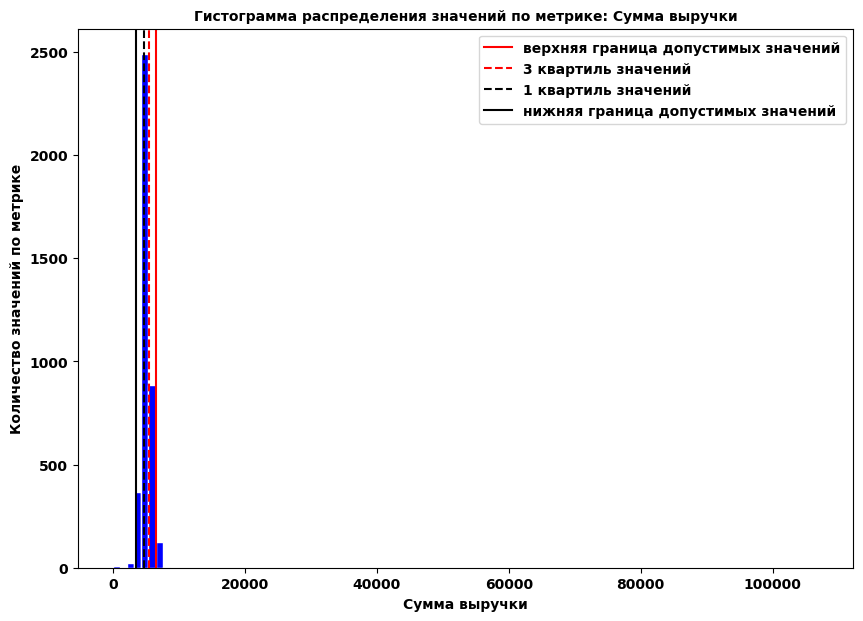

Верхняя допустимая граница значений: 6522.275000000001
Нижняя допустимая граница значений: 3430.874999999999
Медианное значение: 4957.5
Среднее значение: 5025.7
Доля значений, выходящих за верхнюю границу: 2.77%
Доля значений, выходящих за нижнюю границу: 1.72%


In [34]:
histogram_plotting(market_money, 'revenue', 100, 10, 7, 'Сумма выручки')

**Вывод по промежуточному этапу:**
* **revenue** - сумма выручки
    * Распределение имеет вид **отличного от нормального**. Значения группируются около медианы **4 600**. Среднее значение - **5 025**;
    * Замечено наличие аномально высоких значений - пользователи с суммой выручки более 100 000.
    * На этапе подготовки данных к машинному обучению потребуется произвести **нормирование данных**.

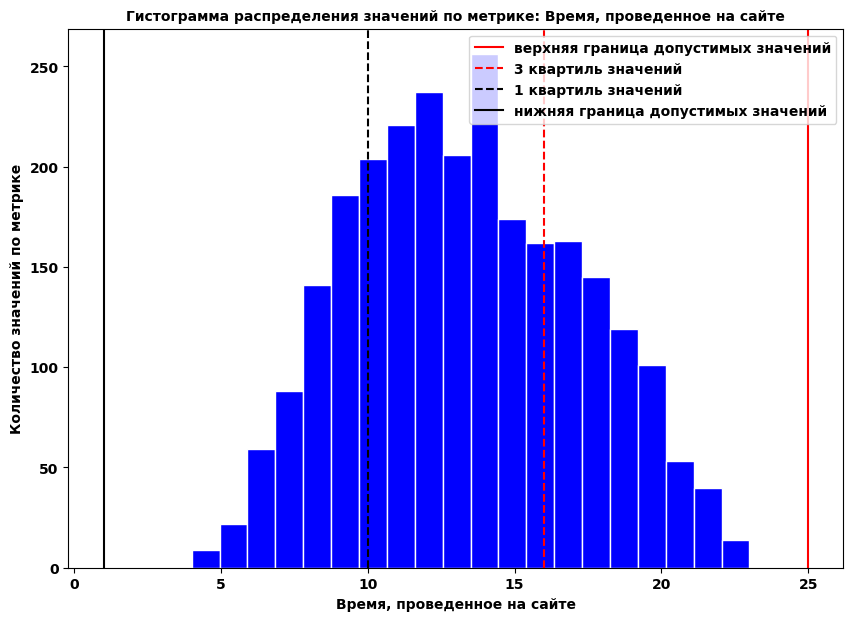

Верхняя допустимая граница значений: 25.0
Нижняя допустимая граница значений: 1.0
Медианное значение: 13.0
Среднее значение: 13.34
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [35]:
histogram_plotting(market_time, 'minutes', 20, 10, 7, 'Время, проведенное на сайте')

**Вывод по промежуточному этапу:**
* **minutes** - время, проведенное на сайте, в минутах
    * Распределение имеет вид **нормального**. Значения группируются около медианы **13**. Среднее значение - **13.3**;
    * Аномально высоких или малых значений **не обнаружено**.

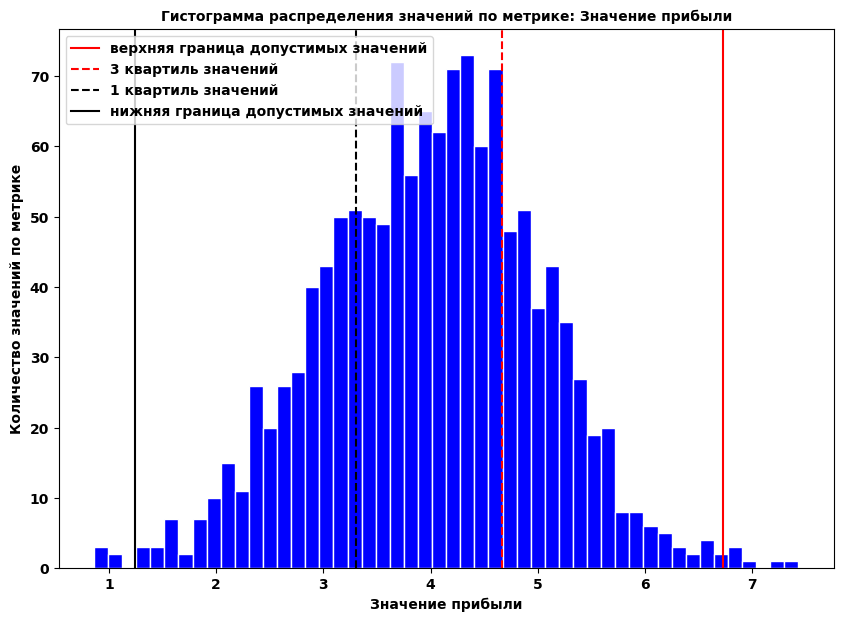

Верхняя допустимая граница значений: 6.725
Нижняя допустимая граница значений: 1.2449999999999997
Медианное значение: 4.045
Среднее значение: 4.0
Доля значений, выходящих за верхнюю границу: 0.54%
Доля значений, выходящих за нижнюю границу: 0.38%


In [36]:
histogram_plotting(money, 'profit', 50, 10, 7, 'Значение прибыли')

**Вывод по промежуточному этапу:**
* **profit** - значение прибыли
    * Распределение имеет вид **нормального**. Значения группируются около медианы **4.045**. Среднее значение - **4.0**;
    * Имеются небольшие выбросы, но не влияющие на общий характер данных.

In [38]:
# исключение аномально больших значений в наборе 'market_money' по границе 100_000
market_money = market_money[market_money['revenue'] < 100_000]

# отбор клиентов с покупательской активностью не менее 3 месяцев - которые что-либо покупали в этот период
clients_3_month = market_money['user_id'].value_counts()
clients_3_month = clients_3_month[clients_3_month >= 3].index

# создание нового набора данных с пользователями, которые совершали покупки не менее 3 месяцев
market_money_3_month = market_money[market_money['user_id'].isin(clients_3_month)]

(3897, 3)

**Вывод**

1. Выведена на экран основная статистическая информация по текущим версиям наборов данных:
    * Набор `market_file` характеризуется следующими статистическими показателями:
        * **market_activity_6_months - среднемесячное значение маркетинговых коммуникаций на пользователя**:
            * Среднее значение - 4.3;
            * Минимальное значение - 0.9;
            * Максимальное значение - 6.6;
            * Стандартное отклонение - 1.1.
        * **market_activity_current_month - количество маркетинговых коммуникаций в текущем месяце**:
            * Среднее значение - 4.0;
            * Минимальное значение - 3.0;
            * Максимальное значение - 5.0;
            * Стандартное отклонение - 0.7. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
        * **duration - сколько времени прошло с момента регистрации пользователя на сайте**:
            * Среднее значение - 601.9;
            * Минимальное значение - 110;
            * Максимальное значение - 1 079;
            * Стандартное отклонение - 249,9. Ряд данных достаточно вариативен, но **явных выбросов пока не обнаружено**. Потребуется проверка на следующих шагах.
        * **discount_purchases - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев**:
            * Среднее значение - 0.32;
            * Минимальное значение - 0.0;
            * Максимальное значение - 0.99;
            * Стандартное отклонение - 0.25. Заметно значение в 99% совершенных покупок по акции - скорее всего пользователь совершает покупки исключительно акционных товаров.
        * **average_category_views - показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца**:
            * Среднее значение - 3.3;
            * Минимальное значение - 1.0;
            * Максимальное значение - 6.0;
            * Стандартное отклонение - 1.4. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
        * **unpaid_products - общее число неоплаченных товаров в корзине за последние 3 месяца**:
            * Среднее значение - 2.8;
            * Минимальное значение - 0.0;
            * Максимальное значение - 10.0;
            * Стандартное отклонение - 2.0. Заметно большое максимальное значение в 10 неоплаченных единиц - вероятно, что это есть уникальный пользователь, который добавил в корзину большое значение товаров с целью последующей будущей покупки (корзина выполняет роль "Избранное").
        * **service_error - число сбоев, которые коснулись покупателя во время посещения сайта**:
            * Среднее значение - 4.2;
            * Минимальное значение - 0.0;
            * Максимальное значение - 9.0;
            * Стандартное отклонение - 2.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
        * **pages_per_visit - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца**:
            * Среднее значение - 8.2;
            * Минимальное значение - 1.0;
            * Максимальное значение - 20.0;
            * Стандартное отклонение - 4.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
    * Набор `market_money` характеризуется следующими статистическими показателями:
        * **revenue - сумма выручки за период**:
            * Среднее значение - 5 025.7;
            * Минимальное значение - 0.0;
            * Максимальное значение - 106 862.2;
            * Стандартное отклонение - 1 777.7. **Обнаружена аномально большая сумма выручки**. Потребуется проверка на следующих шагах и устранение аномалий.
    * Набор `market_time` характеризуется следующими статистическими показателями:
        * **minutes - время, проведенное на сайте, в минутах**:
            * Среднее значение - 13.3;
            * Минимальное значение - 4.0;
            * Максимальное значение - 23.0;
            * Стандартное отклонение - 4.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
    * Набор `money` характеризуется следующими статистическими показателями:
        * **profit - значение прибыли**:
            * Среднее значение - 4.0;
            * Минимальное значение - 0.86;
            * Максимальное значение - 7.43;
            * Стандартное отклонение - 1.0. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
2. Исследование соотношения количества значений качественных показателей
    * Набор `market_file` характеризуется следующими показателями:
        * Значения по признаку **buyer_activity** соотнесены не в равных пропорциях: 802 (62%) - 498 (32%);
        * Значения по признаку **service_type** соотнесены не в равных пропорциях: 924 (71%) - 376 (29%);
        * Значения по признаку **allow_notifications** соотнесены не в равных пропорциях: 962 (74%) - 338 (26%);
        * Значения по признаку **popular_category** распределены более равномерно, чем значения по остальным показателям. Диапазон варьируется от 138 до 330.
    * Набор `market_money` характеризуется следующими показателями:
        * Значения по признаку **period** соотнесены не в равных пропорциях: 2 600 (62%) - 1 300 (32%);
    * Набор `market_time` характеризуется следующими показателями:
        * Значения по признаку **period** соотнесены в равных пропорциях: 1 300 (50%) - 1 300 (50%);
3. Исследование распределения количественных показателей наборов. Построение **гистограмм распределения значений**:
    * Набор `market_file` характеризуется следующими показателями:
        * **market_activity_6_months** - среднемесячное значение маркетинговых коммуникаций
            * Распределение имеет вид **нормального**. Значения группируются около среднего **4.25** и медианы **4.2**;
            * Заметны как несколько объектов с большим количеством маркетинговых коммуникаций (>6), так и объекты с минимальным количеством коммуникаций (<2).
        * **market_activity_current_month** - количество маркетинговых коммуникаций за текущий месяц
            * Большая часть значений находится на отметке 4;
            * Пользователи с 3 и 5 маркетинговыми коммуникациями имеют примерно одинаковое соотношение.
        * **duration** - длительность пребывания на сайте
            * Распределение имеет вид **нормального**. Значения группируются около среднего **601.9** и медианы **606**;
            * Аномально малых и высоких значений длительности посещения **не обнаружено**.
        * **discount_purchases** - доля акционных покупок
            * Заметно разделение пользователей на группы: основная масса покупателей и покупателей, совершающих покупки при наличии скидки;
            * Заметны так же отдельные объекты, поведение которых нельзя отнести ни к одной, ни к другой группам.
        * **average_category_views** - среднее число категорий, просмотренных за визит
            * Распределение имеет вид **нормального**. Значения группируются около среднего **3.3** и медианы **3.0**;
            * Аномально малых и высоких значений длительности посещения **не обнаружено**;
        * **unpaid_products** - число неоплаченных товаров в корзине
            * Значения группируются около среднего **2.8** и медианы **3.0**;
            * Замечено наличие аномально высоких значений - пользователи с количеством продуктов в корзине порядка 10;
        * **service_error** - число сбоев за время посещения сайта
            * Распределение имеет вид **нормального**. Значения группируются около среднего **4.2** и медианы **4.0**;
            * Аномально малых и больших значений **не обнаружено**.
        * **pages_per_visit** - число страниц, просмотренных за визит
            * Распределение имеет вид **нормального**. Значения группируются около среднего **8.2** и медианы **8.0**;
            * Аномально малых и больших значений **не обнаружено**.
    * Набор `market_money` характеризуется следующими показателями:
        * **revenue** - сумма выручки:
            * Распределение имеет вид **отличного от нормального**. Значения группируются около медианы **4 600**. Среднее значение - **5 025**;
            * Замечено наличие аномально высоких значений - пользователи с суммой выручки более 100 000.
            * На этапе подготовки данных к машинному обучению потребуется произвести **нормирование данных**.
    * Набор `market_time` характеризуется следующими показателями:
        * **minutes** - время, проведенное на сайте, в минутах
            * Распределение имеет вид **нормального**. Значения группируются около медианы **13**. Среднее значение - **13.3**;
            * Аномально высоких или малых значений **не обнаружено**.
    * Набор `money` характеризуется следующими показателями:
        * **profit** - значение прибыли
            * Распределение имеет вид **нормального**. Значения группируются около медианы **4.045**. Среднее значение - **4.0**;
            * Имеются небольшие выбросы, но не влияющие на общий характер данных.
4. Произведена фильтрация наборов данных - **выбраны клиенты с покупательской активностью не менее 3 месяцев**. Исключены аномально большие значения из наборов данных.

## Объединение таблиц <a class = 'anchor' id = 'Объединение'></a>

In [49]:
# инициализация пользовательской функции по выделению значений по условию в отдельные столбцы
def value_split(df : pd.DataFrame, value_column : str, condition : str, new_column : str):
    df[new_column] = df.apply(lambda x: x[value_column] if x['period'] == condition else 0, axis=1)
    return df

In [52]:
# создание новых столбцов с выручкой и временем для каждого периода
market_time = value_split(market_time, 'minutes', 'текущий_месяц', 'current_period_minutes')
market_time = value_split(market_time, 'minutes', 'предыдущий_месяц', 'previous_period_minutes')
market_money = value_split(market_money, 'revenue', 'текущий_месяц', 'current_period_revenue')
market_money = value_split(market_money, 'revenue', 'предыдущий_месяц', 'previous_period_revenue')